In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, nsolve
from sympy import cosh, sin , sinh, cos,exp
from scipy.special import sph_harm,factorial
from scipy.optimize import fsolve
from scipy.integrate import quad
import numba
from decimal import Decimal, getcontext
getcontext().prec = 50  # 设置精度

In [75]:
e2=1.43997 ; hbarc=197.3269718 ; amu=931.49432
zp=55 ; Ap=112 ; mp=Ap*amu-46.41
z1=54 ; A1=111 ; m1=A1*amu-54.52
z2=1  ; A2=1   ; m2=A2*amu+7.288971064
Q=mp-m1-m2
mu=m1*m2/(m1+m2)

$\frac{\partial}{\partial \theta}Y_{l,m}(\theta,\phi)=\frac{1}{(2l+1)\sin\theta}\left [l(l-m+1)\frac{N_{l,m}}{N_{l+1,m}}Y_{l+1,m}(\theta,\phi)-(l+1)(l+m)\frac{N_{l,m}}{N_{l-1,m}}Y_{l-1,m}(\theta,\phi)]      \right],N_{l,m}=\sqrt{\frac{(2l+1)(l-m)!}{4\pi(l+m)!}}$

$V_{so}=V_{so0}\lambda_\pi^2\frac{1}{r}\frac{d}{dr}\frac{1}{1+\exp[(r-R_{so})/a_{so}]}\vec{\sigma}\cdot\vec{l}=\frac{V_{so0}\lambda_\pi^2}{a_{so}}\times \frac{-e^{\frac{r-R_{so}}{a_{so}}}}{r(1+e^{\frac{r-R_{so}}{a_{so}}})^2}\times\frac{J(J+1)-L(L+1)-S(S+1)}{2}$


In [76]:
Vso0=6.2 ; rso=1.01*(A1)**(1/3) ; aso=0.75 ; lambda_pi=np.sqrt(2)

In [77]:
Nlm=lambda l,m: np.sqrt((2*l+1)/(4*np.pi)*factorial(l-m)/factorial(l+m))
#derivative of Ylm on theta, theta exists on the denominator, so use epsilon to avoid division by zero
def dYlm(l,m,theta,phi):
    epsilon=1e-20
    return (1/(2*l+1)/(np.sin(theta)+epsilon))*(l*(l-m+1)*Nlm(l,m)/Nlm(l+1,m)*sph_harm(m,l+1,phi,theta)-(l+1)*(l+m)*Nlm(l,m)/Nlm(l-1,m)*sph_harm(m,l-1,phi,theta))

#deformed potential,with deformed paras beta, polarization params beta_tilde
def Vn(V0,r0,a0,beta2,beta4,beta2_tilde,beta4_tilde,r,theta):
    Y20=sph_harm(0, 2, 0, theta)  #sph_harm(m,l,phi,theta)
    Y40=sph_harm(0, 4, 0, theta)
    r0_theta=r0*(1+beta2*Y20+beta4*Y40)         #deformation

    # delta_theta=1e-6
    # dY20=(sph_harm(0, 2, 0, theta+delta_theta)-sph_harm(0, 2, 0, theta))/(delta_theta)
    # dY40=(sph_harm(0, 4, 0, theta+delta_theta)-sph_harm(0, 4, 0, theta))/(delta_theta)
    dY20=dYlm(2,0,theta,0)
    dY40=dYlm(4,0,theta,0)
    dr0_theta=r0*(beta2*dY20+beta4*dY40)       

# polarization
    a0_theta=a0*np.sqrt(1+(1/r0_theta*dr0_theta)**2)*(1+beta2_tilde*Y20+beta4_tilde*Y40) 

    return -V0/(1+np.exp((r-r0_theta)/a0_theta))

#V_{so}, with lambda_pi being the wave number of pion
def Vso(Vso0,rso,aso,lambda_pi,L,S,J,r):
    return Vso0*lambda_pi**2/aso*(-np.exp((r-rso)/aso)/(r*(1+np.exp((r-rso)/aso))**2))*(J*(J+1)-L*(L+1)-S*(S+1))/2




In [78]:
J=1 ; S=1/2 ; L=0

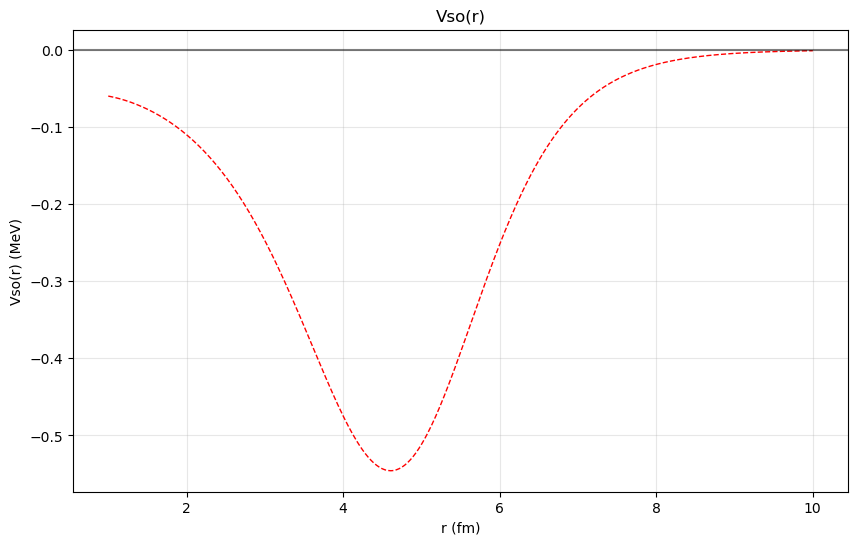

In [79]:
# 创建径向距离数组
r_values = np.linspace(1, 10, 500)

# 计算自旋轨道耦合势
Vso_values = Vso(Vso0, rso, aso, lambda_pi, L, S, J, r_values)

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(r_values, Vso_values, 'r--', linewidth=1)
plt.xlabel('r (fm)')
plt.ylabel('Vso(r) (MeV)')
plt.title('Vso(r)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
C:\Users\16437\AppData\Local\Temp\ipykernel_21580\1476465963.py:17: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(r, np.real(y2), 'r--', linewidth=1, label='$V_0d,\\theta=\pi/8$')


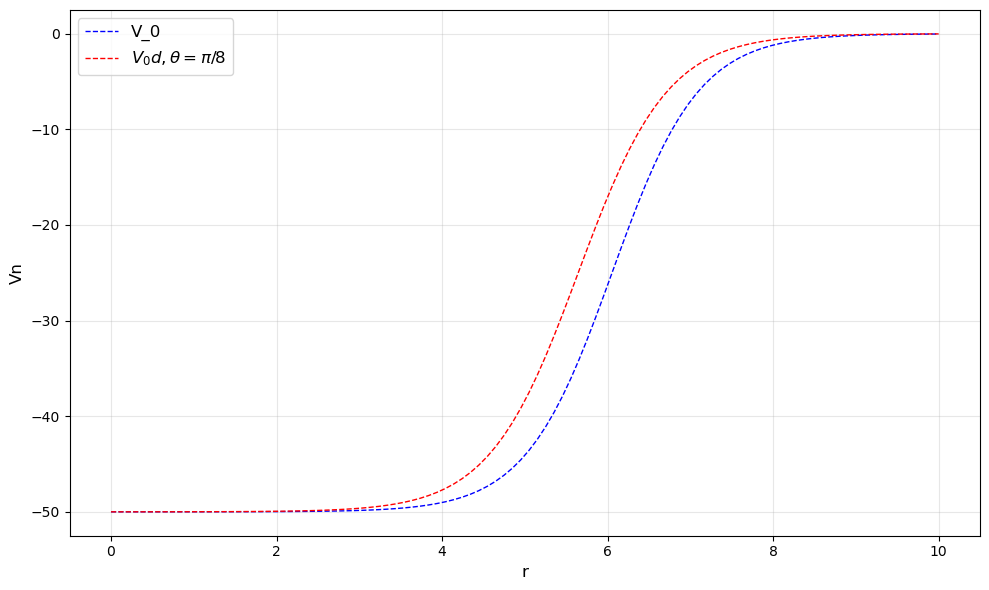

In [80]:
# 参数设置
V0 = 50
r0 = 5
a0 = 0.5
beta2 = 0.2
beta4 = 0.1
beta2_tilde = 0.05
beta4_tilde = 0.02

r=np.linspace(0,10,100)
y1=Vn(V0,r0,a0,beta2,beta4,beta2_tilde,beta4_tilde,r,0)
y2=Vn(V0,r0,a0,beta2,beta4,beta2_tilde,beta4_tilde,r,np.pi/8)

plt.figure(figsize=(10, 6))

plt.plot(r, np.real(y1), 'b--', linewidth=1, label='V_0')
plt.plot(r, np.real(y2), 'r--', linewidth=1, label='$V_0d,\\theta=\pi/8$')

plt.xlabel('r', fontsize=12)
plt.ylabel('Vn', fontsize=12)

plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()